In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the masked satellite aerial image
image_path = '/content/drive/MyDrive/Dataset-Segmentation/masks-1/image_part_029.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the RGB masks for each property
mask_water = np.array([226,169,41])
mask_road = np.array([110,193,228])
mask_vegetation = np.array([254,221,58])
mask_buildings = np.array([60,16,152])
mask_land = np.array([132,41,246])

In [39]:
# Create binary masks based on the RGB values
def create_binary_mask(image_rgb, color_mask):
    return np.all(image_rgb == color_mask, axis=-1).astype(np.uint8)

# Generate binary masks
mask_water_binary = create_binary_mask(image_rgb, mask_water)
mask_road_binary = create_binary_mask(image_rgb, mask_road)
mask_vegetation_binary = create_binary_mask(image_rgb, mask_vegetation)
mask_buildings_binary = create_binary_mask(image_rgb, mask_buildings)
mask_land_binary = create_binary_mask(image_rgb, mask_land)

# Count pixels for each mask
water_pixels = np.sum(mask_water_binary)
road_pixels = np.sum(mask_road_binary)
veg_pixels = np.sum(mask_vegetation_binary)
build_pixels = np.sum(mask_buildings_binary)
land_pixels = np.sum(mask_land_binary)
total_pixels = image_rgb.shape[0] * image_rgb.shape[1]

# Calculate percentages
water_percentage = (water_pixels / total_pixels) * 100
road_percentage = (road_pixels / total_pixels) * 100
veg_percentage = (veg_pixels / total_pixels) * 100
build_percentage = (build_pixels / total_pixels) * 100
land_percentage = (land_pixels / total_pixels) * 100


In [40]:
# Print the results
print(f"Water area: {water_pixels} pixels, {water_percentage:.2f}% of the image")
print(f"Road area: {road_pixels} pixels, {road_percentage:.2f}% of the image")
print(f"Vegetation area: {veg_pixels} pixels, {veg_percentage:.2f}% of the image")
print(f"Building area: {build_pixels} pixels, {build_percentage:.2f}% of the image")
print(f"Land area: {land_pixels} pixels, {land_percentage:.2f}% of the image")


Water area: 42263 pixels, 4.55% of the image
Road area: 105764 pixels, 11.38% of the image
Vegetation area: 184248 pixels, 19.82% of the image
Building area: 450622 pixels, 48.47% of the image
Land area: 146857 pixels, 15.80% of the image


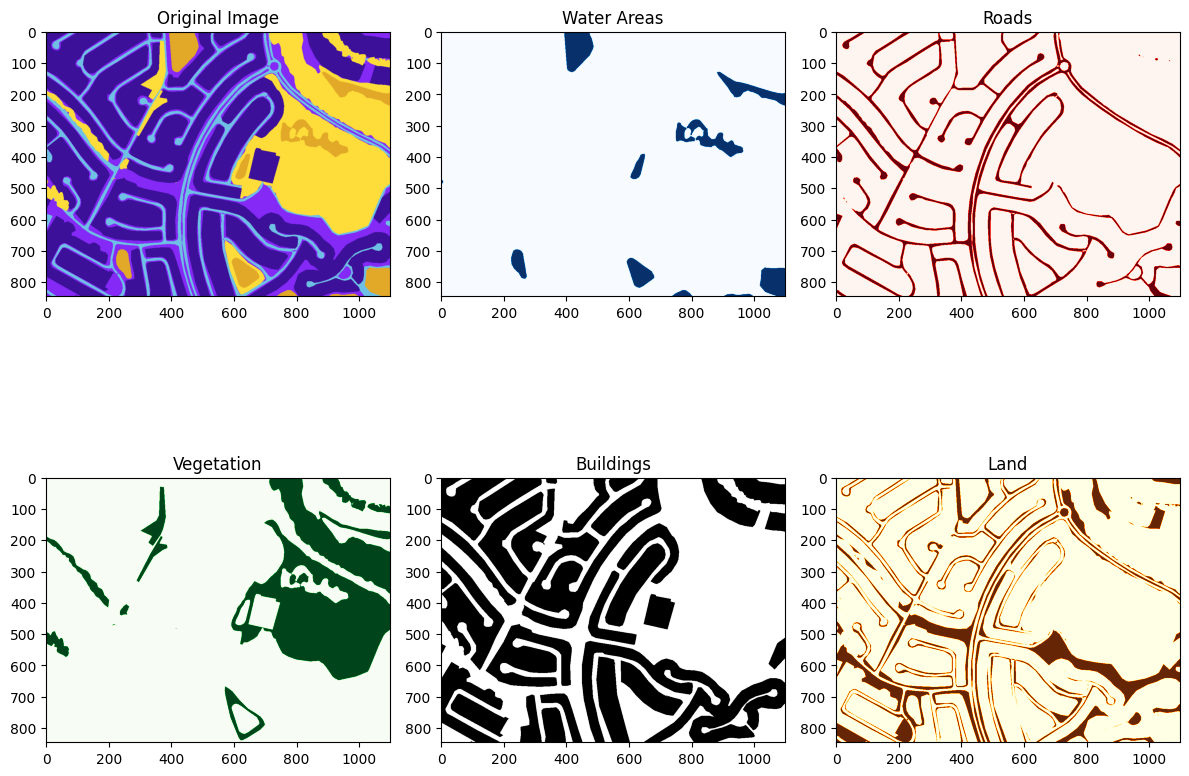

In [41]:
# Plot the original image and the masks
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)

plt.subplot(2, 3, 2)
plt.title('Water Areas')
plt.imshow(mask_water_binary, cmap='Blues')

plt.subplot(2, 3, 3)
plt.title('Roads')
plt.imshow(mask_road_binary, cmap='Reds')

plt.subplot(2, 3, 4)
plt.title('Vegetation')
plt.imshow(mask_vegetation_binary, cmap='Greens')

plt.subplot(2, 3, 5)
plt.title('Buildings')
plt.imshow(mask_buildings_binary, cmap='Greys')

plt.subplot(2, 3, 6)
plt.title('Land')
plt.imshow(mask_land_binary, cmap='YlOrBr')

plt.tight_layout()
plt.show()
